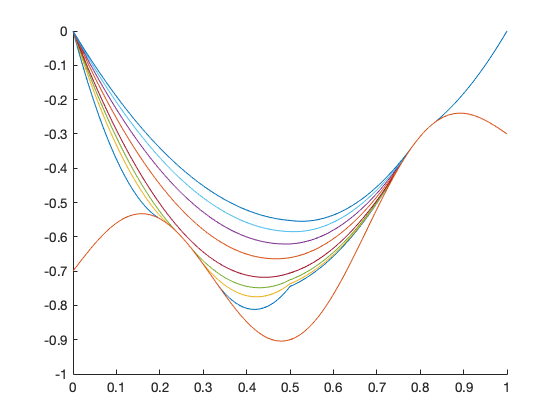

In [22]:
global H;
H=200;
M1 = linspace(.05,.25,8)';
M2 = linspace(-.005,.5,8)';
mu0 = [0.075, 0.4];
MU1 = [M1 ones(8,1)*mu0(2)];
MU2 = [ones(8,1)*mu0(1) M2];

hold on;
for i = 1:8
    active_set(MU1(i,:),true);
end


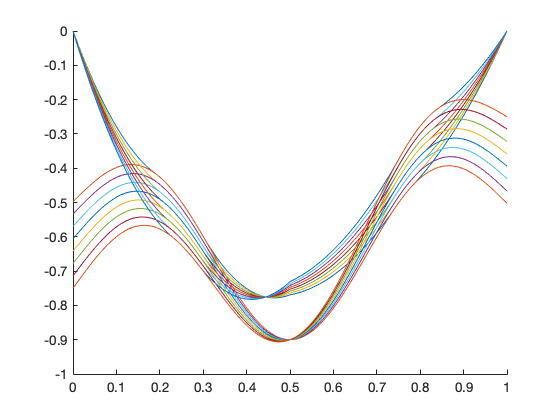

In [23]:

hold on;
for i = 1:8
    active_set(MU2(i,:),true);
end


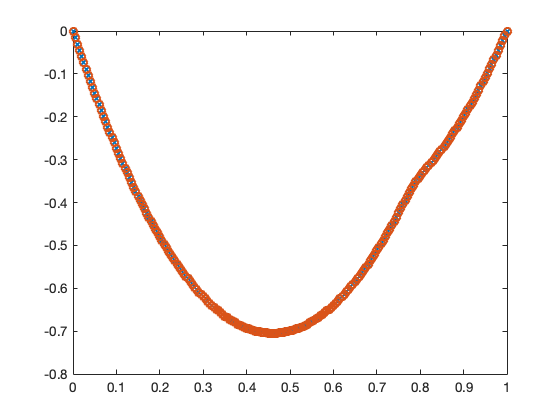

In [24]:
%test dim = 1 %pass
mu = [0.15, 0.3];
% mu = [0.4, 0.2];
[U,Lambda] = active_set(mu,false);
plot(xx,U,'x')
[U_N,Lambda_N,Alpha,Beta] = U_reduced(mu,U,Lambda);
hold on;
plot(xx,U_N,'o')

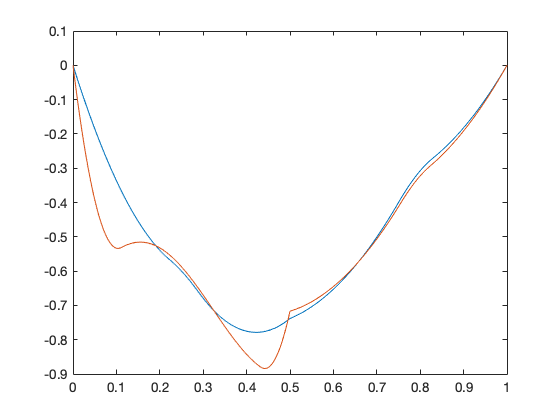

In [27]:
%dim=2, pass
global H
H=200;
xx = linspace(0,1,H+1)';
mu1 = [0.075, 0.4];
mu2 = [0.01, 0.35];
[U1,Lambda1] = qp_constraint_poisson(mu1,false);
[U2,Lambda2] = qp_constraint_poisson(mu2,false);
U = [U1 U2];
Lambda = [Lambda1 Lambda2];%2 bases
plot(xx,U1)
hold on 
plot(xx,U2)     

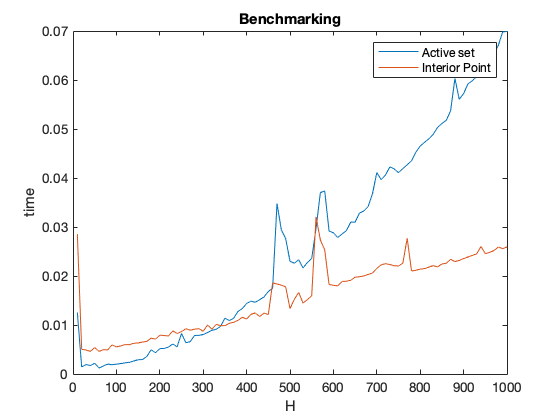

In [53]:

%computing time for both QP methods
t1 = zeros(20,1);t2 = zeros(20,1);

global H;
for i = 1:100
    H = 10*i;
    tic;
    active_set(mu0,false);
    t1(i) = toc;
    tic;
    qp_constraint_poisson(mu0,false);
    t2(i) = toc;
end
plot(10:10:1000,t1)
hold on 
plot(10:10:1000,t2)
legend('Active set','Interior Point')
xlabel('H')
ylabel('time')
title('Benchmarking')

Delta(u,X) = 1.730359, Dimention of RB = 2
Delta(u,X) = 0.370928, Dimention of RB = 3
Delta(u,X) = 0.477409, Dimention of RB = 4
Delta(u,X) = 0.314185, Dimention of RB = 5
Delta(u,X) = 0.145064, Dimention of RB = 6
Delta(u,X) = 0.163593, Dimention of RB = 7
Delta(u,X) = 0.068535, Dimention of RB = 8
Delta(u,X) = 0.061185, Dimention of RB = 9
Delta(u,X) = 0.034095, Dimention of RB = 10


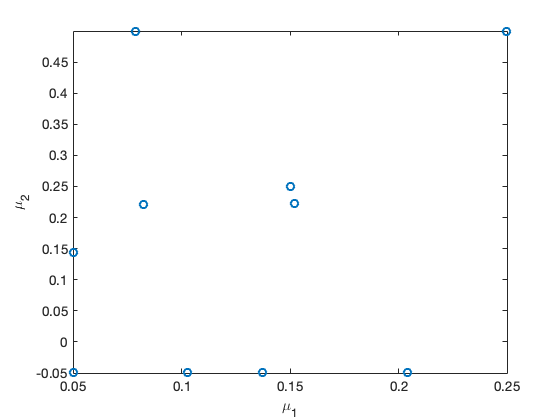

In [51]:
H=200;
max_iter = 10;
% [U_true, Lambda] = active_set();
mm = [.05,-.05];
MM = [.25,.5];

mu = [.15,.25];
[U,Lambda] = active_set(mu,false);
EPS = .001;
opts1 = optimset('display','off');
for i = 2:max_iter
    [mu_max,fval] = fmincon(@(mu)-delta_true(mu,U,Lambda),mu(end,:),[],[],[],[],mm,MM,[],opts1);
    fprintf("Delta(u,X) = %f, Dimention of RB = %d\n", -fval,i);
    mu = [mu;mu_max];
    [U_max,Lambda_max] = qp_constraint_poisson(mu_max,false);
    U = [U U_max];
    Lambda = [Lambda Lambda_max];
    if abs(fval) < EPS
        break;
    end
end
plot(mu(:,1),mu(:,2),'o')
xlabel("\mu_1")
ylabel("\mu_2")
xlim([.05,.25])
ylim([-.05,.5])

In [31]:
w = warning('query','last');
warning('off',w.identifier)


w = 

  struct with fields:

    identifier: 'optim:quadprog:HessianNotSym'
         state: 'on'



Delta(u,X) = 7941.498919, Dimention of RB = 2
Delta(u,X) = 8252.344152, Dimention of RB = 3
Delta(u,X) = 8333.946101, Dimention of RB = 4
Delta(u,X) = 8333.946180, Dimention of RB = 5
Delta(u,X) = 8333.946173, Dimention of RB = 6
Delta(u,X) = 8333.946175, Dimention of RB = 7
Delta(u,X) = 8333.946176, Dimention of RB = 8
Delta(u,X) = 8333.946176, Dimention of RB = 9
Delta(u,X) = 8333.946178, Dimention of RB = 10


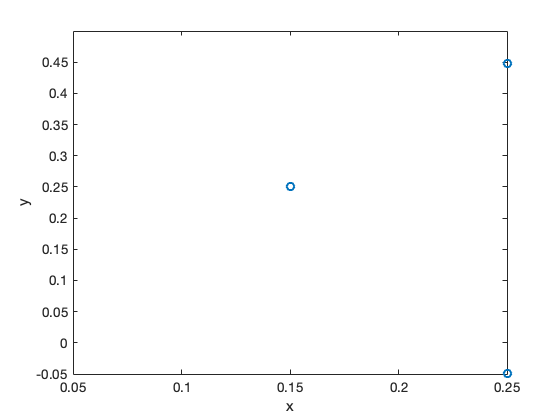

In [52]:
H=200;
max_iter = 10;
% [U_true, Lambda] = active_set();
mm = [.05,-.05];
MM = [.25,.5];

mu = [.15,.25];
[U,Lambda] = active_set(mu,false);
EPS = .001;
opts1 = optimset('display','off');
for i = 2:max_iter
    [mu_max,fval] = fmincon(@(mu)-delta_a_posteriori(mu,U,Lambda),mu(end,:),[],[],[],[],mm,MM,[],opts1);
    fprintf("Delta(u,X) = %f, Dimention of RB = %d\n", -fval,i);
    mu = [mu;mu_max];
    [U_max,Lambda_max] = qp_constraint_poisson(mu_max,false);
    U = [U U_max];
    Lambda = [Lambda Lambda_max];
    if abs(fval) < EPS
        break;
    end
end
plot(mu(:,1),mu(:,2),'o')
xlabel("x")
ylabel("y")
xlim([.05,.25])
ylim([-.05,.5])

In [45]:
[1,-1]>0


ans =

  1x2 logical array

   1   0

